# ♨️ TELECOM X - PARTE 2: PREDICCIÓN DE CANCELACIÓN (Churn)



Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.



# 📊 ANÁLISIS DE LOS DATOS

In [1]:
import pandas as  pd
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('/content/datos_tratados...csv')
datos.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


## Análisis exploratorio inicial

In [2]:

print("Shape:", datos.shape)
print("\nTipos de datos:")
print(datos.info())
print("\nEstadísticas Variables númericas:")
display(datos.describe())
print("\nEstadísticas variables categóricas:")
display(datos.describe(include='O'))

Shape: (7256, 22)

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int64  
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_st

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333



Estadísticas variables categóricas:


,id_cliente,genero,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,metodo_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,month to month,electronic check
freq,1,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


**OBSERVACIONES**



+ La base de datos esta bien estructurada y no tiene datos faltantes ni problemas en sus datos.

+ Hay un desbalnace en la variable de respuesta (abandono), por lo que se hara un ajuste de pesos en el modelo.

+ Se percata de una pposible relacion entre tipo de contrato y abandono,  que puede ser clave para el modelado de datos.

+ Las variables categóricas como tipo_internet, metodo_pago y los servicios contratados ofrecen información valiosa para identificar patrones de cancelación.


### Dsitribución de la variable de respuesta (abandono)

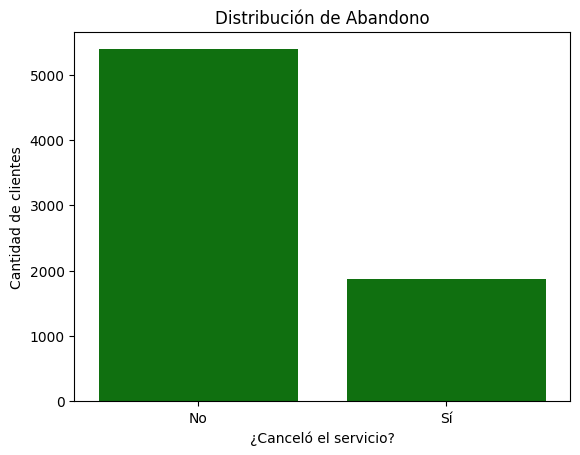

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(data=datos, x='abandono', color='green')
plt.title('Distribución de Abandono')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

**ANÁLISIS**


+ Se observa un desbalance de clase: la mayoria de los clientes no a cancelado. Esto puede influir en los modelos, por lo que es necesario hacer un balance de los datos.

### Histograma de variables númericas

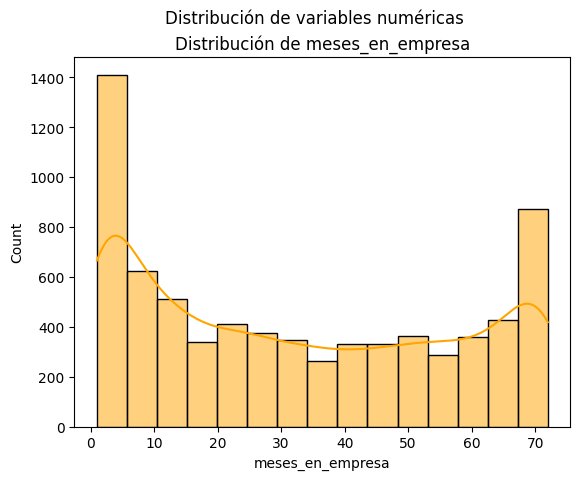

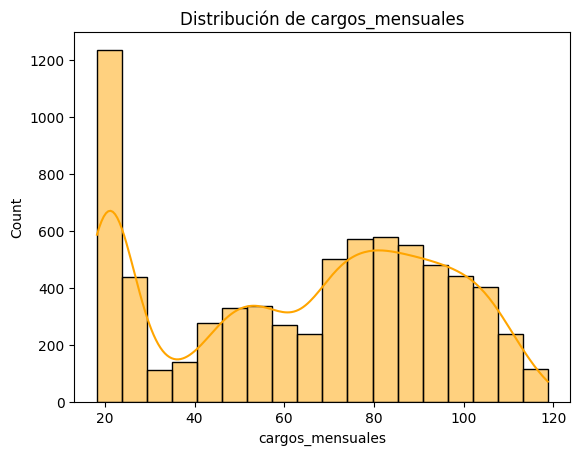

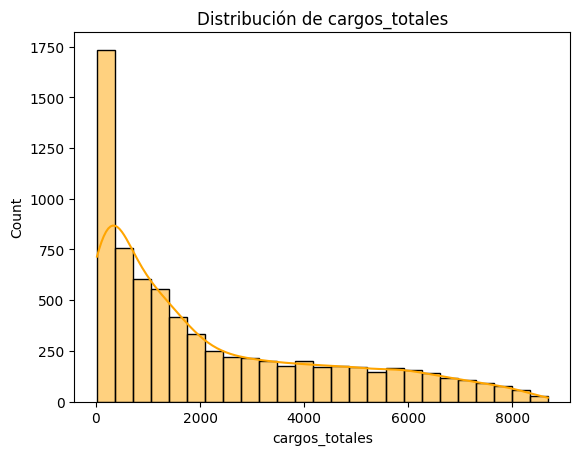

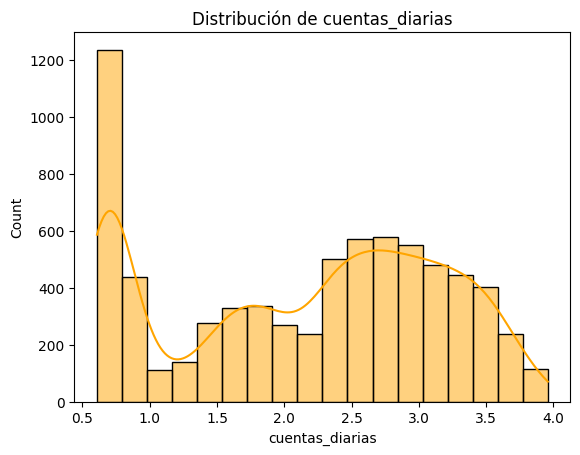

In [9]:
#formula diacons

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2*iqr*np.power(len(df[columna]), -1/3)
  return ancho

numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
plt.suptitle('Distribución de variables numéricas')

for col in numericas:
  binwidth = ancho_bin(datos, col)
  sns.histplot(data=datos,x=col,kde=True, binwidth=binwidth, color='orange')
  plt.title(f'Distribución de {col}')
  plt.show()

**OBSERVACIONES**



+ meses_en_empresa: Incremento de clientes nuevos (alza en los prieros meses).

+ cargos_totales: distribución sesgada a la derecha, algunos clientes acumulan muchos cargos.

+ cuentas_diarias y cuentas_mensuales: parece tener un rango limitado, útil para normalizar después, a demás ambos gráficos muestra una gran similitud por lo que puede sesgar el modelo.

###Boxplots: Variables numéricas vs Abandono

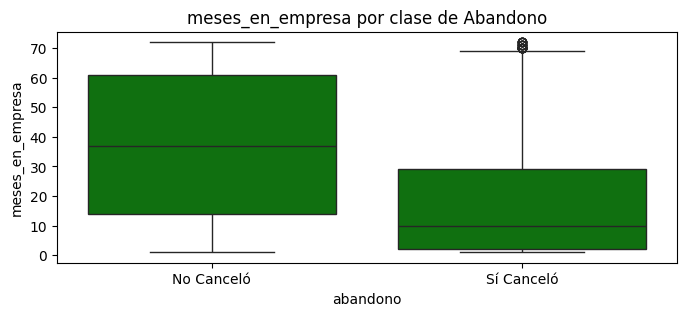

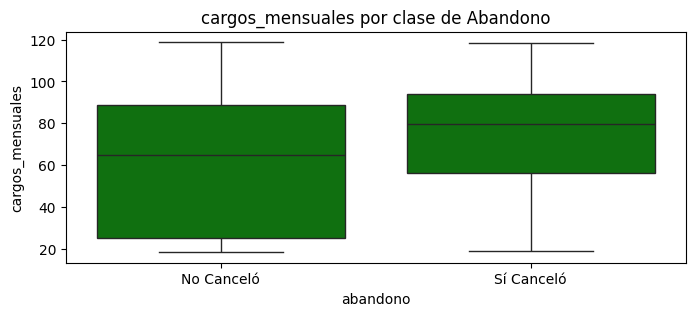

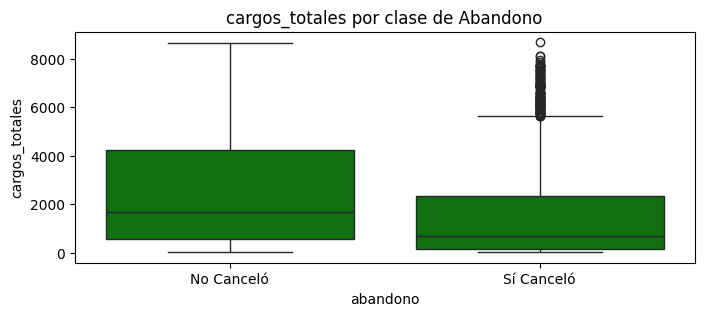

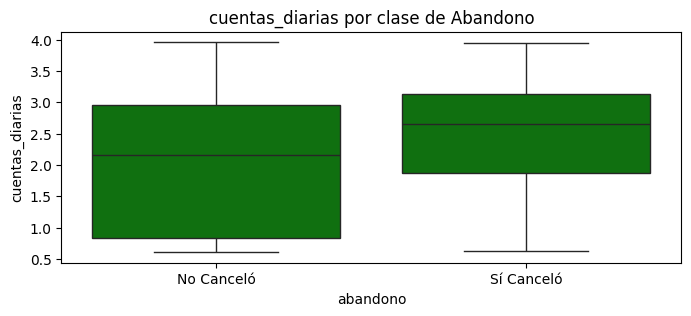

In [11]:
for col in numericas:
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=datos, x='abandono', y=col, color='green')
    plt.title(f'{col} por clase de Abandono')
    plt.xticks([0, 1], ['No Canceló', 'Sí Canceló'])
    plt.show()

**OBSERVACIONES**



+ Clientes que cancelan no tiene mayor significancia en la empresa.

+ cargos_totales y meses_en_empresa están ligados a la permanencia, por lo tanto son importantes para detectar abandono.

+ meses_en_empresa, cargos_mensuales y cargos_totales tienen mayor importancia y deben ser normalizadas.

### Análisis para el gráfico de barras de: Categória vs Abandono


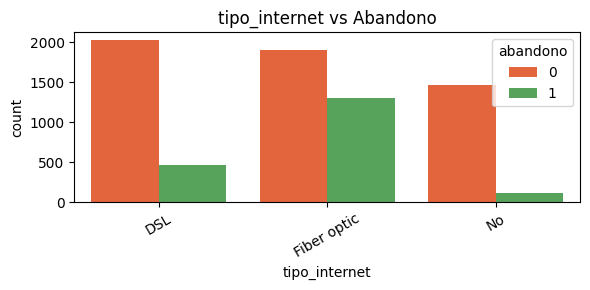

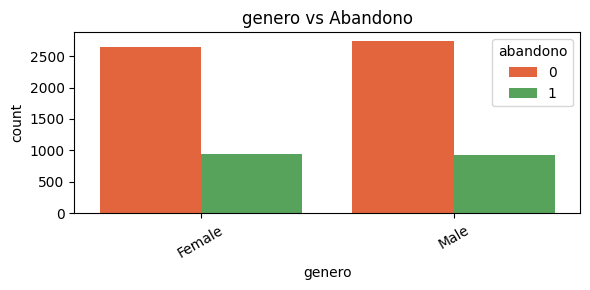

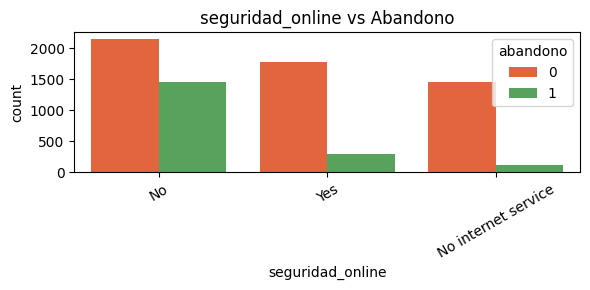

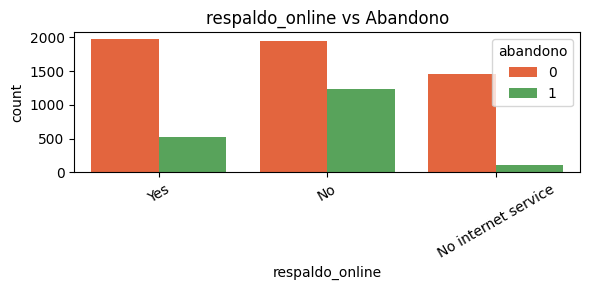

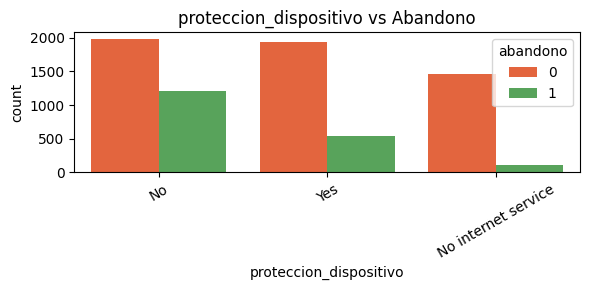

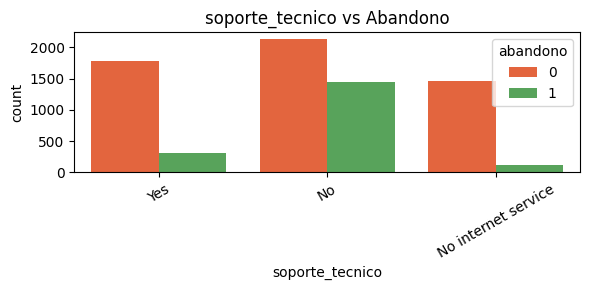

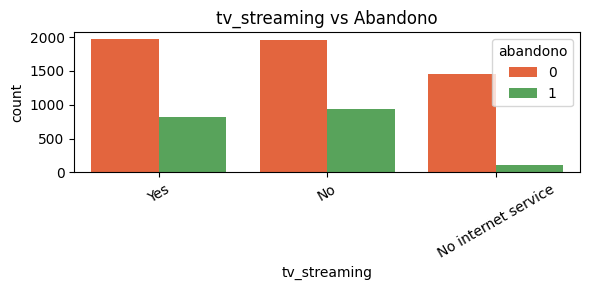

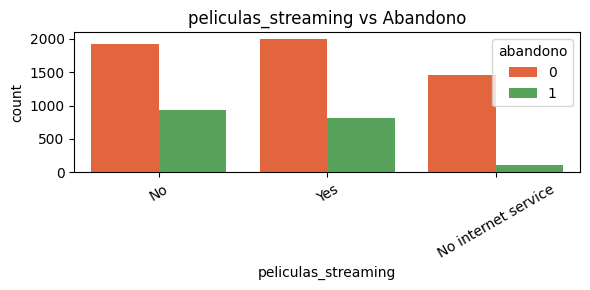

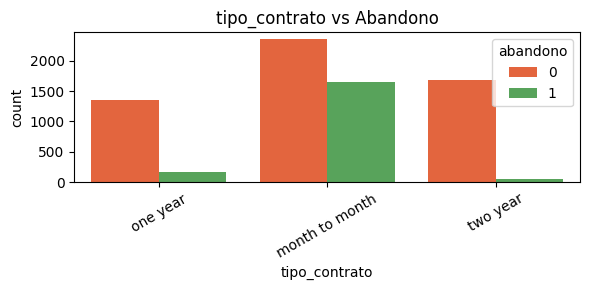

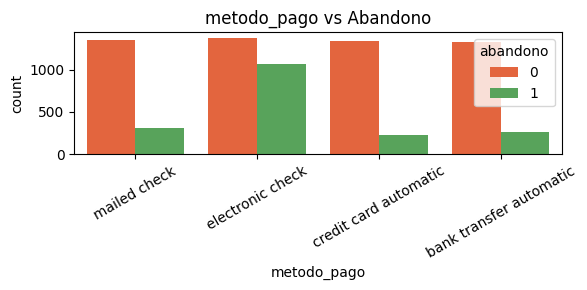

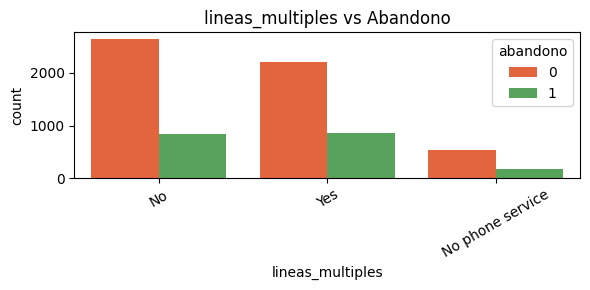

In [7]:
categoricas = ['tipo_internet','genero', 'seguridad_online', 'respaldo_online',
               'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming',
               'peliculas_streaming', 'tipo_contrato', 'metodo_pago',
               'lineas_multiples']
for col in categoricas:
    plt.figure(figsize=(6,3))
    sns.countplot(data=datos, x=col, hue='abandono', palette= ['#FF5722', '#4CAF50'])
    plt.title(f'{col} vs Abandono')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

**OBSERVACIONES**



---



+ Variables altamente correlacionadas con abandono:

-- tipo_contrato:
  Los clientes con contrato "month to month" tienen una tasa de abandono mayor a lo normal.

-- metodo_pago:
  "Electronic check" tiene mayor abandono que pagos automáticos.

-- soporte_tecnico, tv_streaming, seguridad_online:
  Clientes que no contratan estos servicios tienden más al abandono.



---



+ Variables con poca influencia visual:

-- genero:
  No se obsrerva gran relevancia entre hombres y mujeres.

-- es_ciudadano_senior:
  Ligera diferencia.

-- tiene_dependientes y tiene_pareja:
  Patrones no evidentes.

-- servicio_telefonico:
  Casi todos tienen, no aporta variabilidad.

# 🛠️ PREPARACIÓN DE LOS DATOS

### Eliminamos columnas con identificador unico.

In [12]:
datos = datos.drop('id_cliente', axis=1)
datos.sample(2)

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
44,0,Male,0,1,1,25,1,No,DSL,Yes,...,Yes,No,No,No,one year,1,bank transfer automatic,61.60,1611.00,2.053333
4011,0,Female,0,1,0,47,1,No,DSL,Yes,...,Yes,No,Yes,No,one year,1,credit card automatic,66.05,3021.45,2.201667


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   es_ciudadano_senior     7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

**OBSERVACIONES**

---

Se observan variables que tiene cadenas de string (object) por lo que se modificara para que sea compatible con los modelos a tratar.



In [14]:
datos_codi = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codi.sample(2)

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,cuentas_diarias,...,tipo_contrato_month to month,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_bank transfer automatic,metodo_pago_credit card automatic,metodo_pago_electronic check,metodo_pago_mailed check,lineas_multiples_No,lineas_multiples_No phone service,lineas_multiples_Yes
5843,0,0,0,0,15,1,0,25.05,369.10,0.835000,...,0,0,1,1,0,0,0,0,0,1
5500,0,0,1,0,27,1,0,19.55,520.55,0.651667,...,0,0,1,1,0,0,0,1,0,0


**Se usa el parametro get_dummies que nos permite codificar nuestras variables con unos y ceros**

In [15]:
# validacion de los datos

datos_codi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   abandono                                    7256 non-null   int64  
 1   es_ciudadano_senior                         7256 non-null   int64  
 2   tiene_pareja                                7256 non-null   int64  
 3   tiene_dependientes                          7256 non-null   int64  
 4   meses_en_empresa                            7256 non-null   int64  
 5   servicio_telefonico                         7256 non-null   int64  
 6   factura_electronica                         7256 non-null   int64  
 7   cargos_mensuales                            7256 non-null   float64
 8   cargos_totales                              7256 non-null   float64
 9   cuentas_diarias                             7256 non-null   float64
 10  tipo_interne

**En esta validación podemos observar que los datos que se encontraban con cadena de string (object) han cambiado a formato de entero (int), también se logra observar que ha crecido el número de columnas obtenidas.**

##ANÁLISIS DE CORRELACIONES GLOBAL

In [16]:
correlation = datos_codi.corr()['abandono'].sort_values(ascending=False)
print(correlation)

abandono                                      1.000000
tipo_contrato_month to month                  0.395067
seguridad_online_No                           0.335271
soporte_tecnico_No                            0.330060
tipo_internet_Fiber optic                     0.300416
metodo_pago_electronic check                  0.294181
respaldo_online_No                            0.262721
proteccion_dispositivo_No                     0.246512
cuentas_diarias                               0.189393
cargos_mensuales                              0.189393
factura_electronica                           0.186309
es_ciudadano_senior                           0.146400
peliculas_streaming_No                        0.128793
tv_streaming_No                               0.126338
tv_streaming_Yes                              0.062456
peliculas_streaming_Yes                       0.060092
lineas_multiples_Yes                          0.039277
servicio_telefonico                           0.012337
genero_Fem

**OBSERVACIONES**

Este análisis servirá como una referencia exploratoria debido a que:

+ El balanceo modifica artificialmente la distribución de clases, lo cual puede alterar la correlación "real".

+ La normalización no afecta correlación lineal, pero complica la interpretación visual.
---



**1. Variables Positivamente Correlacionadas con Abandono**

| Variable                          | Correlación | Interpretación                                                                                      |
|----------------------------------|-------------|------------------------------------------------------------------------------------------------------|
| tipo_contrato_month to month     | 0.395       | Contratos mensuales están fuertemente ligados a cancelaciones. Clientes sin compromiso se van más. |
| seguridad_online_No              | 0.335       | No contratar seguridad online es un fuerte indicador de abandono.                                   |
| soporte_tecnico_No               | 0.330       | Clientes sin soporte técnico cancelan más. Puede reflejar insatisfacción o bajo engagement.         |
| tipo_internet_Fiber optic        | 0.300       | Clientes con fibra óptica podrían tener mayores expectativas o problemas técnicos no resueltos.     |
| metodo_pago_electronic check     | 0.294       | Pagos con cheque electrónico se asocian a más cancelaciones. Menor automatización/lealtad.          |
| respaldo_online_No               | 0.263       | No tener respaldo online indica menor interés en servicios adicionales, asociado a abandono.        |
| proteccion_dispositivo_No        | 0.247       | Similar al anterior. Menor contratación de servicios adicionales implica menor satisfacción.        |



---
**2. Variables Negativamente Correlacionadas con Abandono**

| Variable                                                       | Correlación         | Interpretación                                                                                   |
|----------------------------------------------------------------|---------------------|--------------------------------------------------------------------------------------------------|
| meses_en_empresa                                               | -0.345              | Clientes con más tiempo en la empresa tienden a quedarse. Variable muy predictiva.              |
| tipo_contrato_two year                                         | -0.294              | Contratos largos retienen mejor. Refuerza la importancia del tipo de contrato.                  |
| cargos_totales                                                 | -0.194              | Clientes que han pagado más tienden a quedarse. Se vincula a la antigüedad.                     |
| metodo_pago_credit card automatic, bank transfer automatic     | ~-0.13 a -0.11      | Pagos automáticos se asocian a mayor permanencia. Mayor compromiso y menor esfuerzo.            |
| seguridad_online_Yes, soporte_tecnico_Yes, proteccion_dispositivo_Yes, etc. | ~-0.16 a -0.06 | Contar con servicios adicionales se asocia a menor churn. Mayor engagement del cliente.         |

# ⛓️‍💥 SEPARACIÓN DE LAS VARIABLES X (features) Y (target)

In [17]:
#variables explicativas
X = datos_codi.drop('abandono', axis=1)

#variable de respuesta
y = datos_codi['abandono']

##  SEPARANDO LOS DATOS EN TRAIN Y TEST

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## BALANCE DE CLASES CON SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#verificar nuevo balance

print('Distribución original de clases:', Counter(y))
print('Distribución después de SMOTE:', Counter(y_train_res))

Distribución original de clases: Counter({0: 5387, 1: 1869})
Distribución después de SMOTE: Counter({0: 3771, 1: 3771})


**OBSERVACIONES**


-- Antes de SMOTE, la clase 0 (clientes que no abandonaron) fue mucho mayor que la 1.

-- Después de aplicar SMOTE, ambas clases (0 y 1) se muestran balanceadas, con la misma cantidad de observaciones.

-- Con esto evitamos que el modelo aprenda solo a predecir la clase mayoritaria y mejora la sensibilidad (recall) en la clase minoritaria (los que sí abandonan).

## NORMALIZACIÓN

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

## CREANDO EL DATAFRAME ESCALADO

In [22]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [24]:
X_train_scaled_df['abandono'] = y_train_res.values

## ANÁLISIS DE CORRELACIONES CON DATOS NORMALIZADOS

In [25]:
matriz_corr = X_train_scaled_df.corr()

corr_abandono = matriz_corr['abandono'].drop('abandono')

umbral = 0.15
variables_correlacionadas = corr_abandono[abs(corr_abandono) > umbral].sort_values(ascending=False)

print(variables_correlacionadas)

tipo_contrato_month to month                  0.410053
tipo_internet_Fiber optic                     0.317513
seguridad_online_No                           0.296189
soporte_tecnico_No                            0.295650
cuentas_diarias                               0.243954
cargos_mensuales                              0.243954
respaldo_online_No                            0.197807
metodo_pago_electronic check                  0.196740
proteccion_dispositivo_No                     0.168546
lineas_multiples_No                          -0.154067
genero_Male                                  -0.162434
proteccion_dispositivo_Yes                   -0.179260
tipo_internet_DSL                            -0.189860
metodo_pago_mailed check                     -0.194185
cargos_totales                               -0.210735
respaldo_online_Yes                          -0.213649
metodo_pago_bank transfer automatic          -0.256843
metodo_pago_credit card automatic            -0.263660
tipo_contr

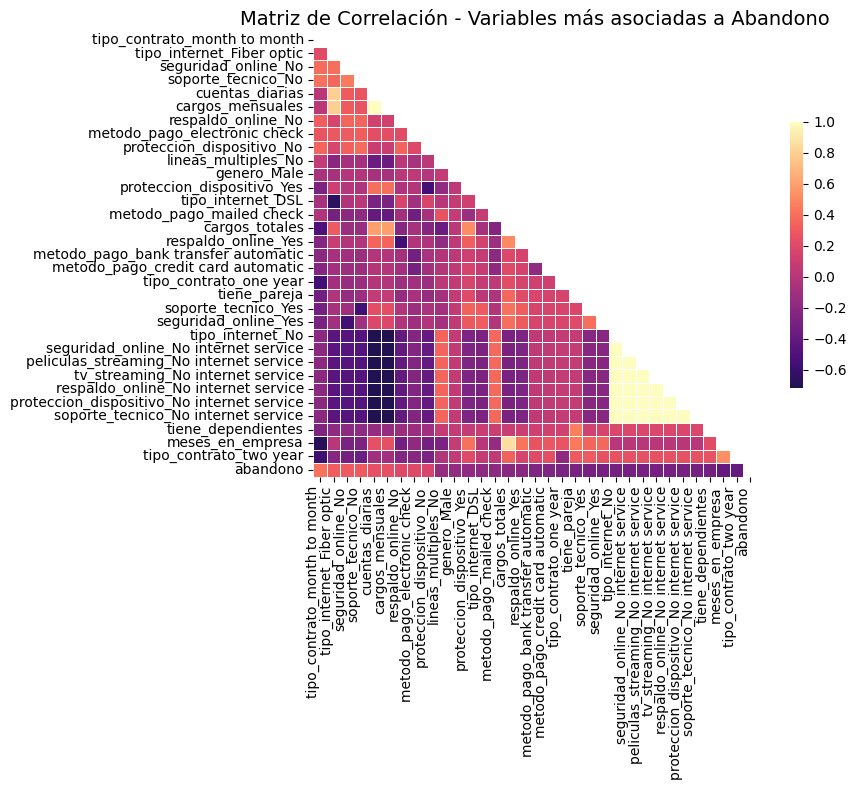

In [26]:
import numpy as np

# Submatriz solo con variables más correlacionadas con abandono
vars_corr = list(variables_correlacionadas.index) + ['abandono']
sub_matriz = X_train_scaled_df[vars_corr].corr()

# Crear una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(sub_matriz, dtype=bool))

# Tamaño y estilo del gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(sub_matriz,
            mask=mask,
            cmap='magma',
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            annot=False)  # Aquí se ocultan los números
plt.title('Matriz de Correlación - Variables más asociadas a Abandono', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**OBSERVACIONES**


1. Los tipos de contrato y la antigüedad del cliente son los factores más críticos en la predicción del abandono.

2.  Las formas de pago y la contratación de servicios adicionales (seguridad, soporte, respaldo) también tienen un impacto considerable.

3. Clientes sin servicios extra ni compromisos contractuales son los más propensos a irse.

En este análisis se pone mayor atención a:

+ tipo_contrato_month to month

+ meses_en_empresa

+ metodo_pago

+ Servicios contratados: seguridad_online, soporte_tecnico, etc.

##CREANDO LA BASELINE CON MODELO DUMMY

In [27]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
y_pred_dummy = dummy.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

acc_dummy = accuracy_score(y_test, y_pred_dummy)
rec_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

#Guardamos los resultados en un DataFrame para futuros análisis.

benchmark_results = pd.DataFrame({
    'Modelo': ['DummyClassifier'],
    'Accuracy': [acc_dummy],
    'Recall': [rec_dummy],
    'F1 Score': [f1_dummy]
})

print("✅ Resultado del modelo Dummy:")
display(benchmark_results)

✅ Resultado del modelo Dummy:


,Modelo,Accuracy,Recall,F1 Score
0,DummyClassifier,0.742306,0.0,0.0


**OBSERVACIONES**



+ El modelo dummy, configurado con la estrategia "most_frequent", predice siempre la clase más común en los datos (en este caso, clientes que no abandonan).

+ Aunque logra una alta precisión (accuracy) debido al desbalance en la variable objetivo, su recall y F1 Score son nulos, lo que indica que no identifica correctamente a los clientes que sí abandonan el servicio.


## SELECCIÓN DE LAS FEATURES MÁS IMPORTANTES

In [29]:
# Selección de K justificada por el desempeño
print("Total de columnas disponibles:", X_train_scaled_df.drop(columns='abandono').shape[1])

Total de columnas disponibles: 42


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

max_k = X_train_scaled_df.drop(columns='abandono').shape[1]
k_range = range(2, max_k + 1, 5)
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

print("Rendimiento del modelo por cantidad de features (k):")
display(metricas)

Rendimiento del modelo por cantidad de features (k):


,2,7,12,17,22,27,32,37,42
Accuracy,0.6647,0.7216,0.7216,0.7359,0.7588,0.7584,0.7598,0.7561,0.7575
Recall,0.8966,0.7986,0.7986,0.7718,0.7665,0.7825,0.7754,0.7594,0.779
F1,0.5795,0.5965,0.5965,0.601,0.6209,0.6254,0.6246,0.6161,0.6234


In [33]:
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]
k_range = range(20, 34 + 1)
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

print("Rendimiento del modelo por cantidad de features (k):")
display(metricas)

Rendimiento del modelo por cantidad de features (k):


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Accuracy,0.757,0.757,0.7588,0.7593,0.7579,0.7584,0.7598,0.7584,0.7616,0.7634,0.7639,0.7584,0.7598,0.763,0.7588
Recall,0.7683,0.7629,0.7665,0.7754,0.7843,0.7754,0.7807,0.7825,0.7825,0.7861,0.7683,0.7807,0.7754,0.7611,0.7504
F1,0.6197,0.6181,0.6209,0.6241,0.6254,0.6232,0.6262,0.6254,0.6285,0.6314,0.6265,0.6248,0.6246,0.6234,0.6159


**OBSERVACIONES**



Accuracy:

+ Aumenta de forma constante desde k=10 (0.7239) hasta alcanzar un máximo de 0.7639 en k=30, con muy ligeras variaciones después.

+ A partir de k=28, la precisión se estabiliza, mostrando rendimientos similares entre k=28 y k=42.

Recall:

+ Altamente sensible en valores bajos de k (0.8021 en k=10), pero desciende conforme se agregan más variables.

+ A partir de k=26 a k=42, el recall se estabiliza en torno a 0.77–0.78, sin mejora significativa.

F1 Score:

+ Aumenta progresivamente desde k=10 (0.5996) y alcanza su máximo valor de 0.6314 en k=29.

+ Luego de k=29, las mejoras en F1 son mínimas, incluso con pequeñas caídas ocasionales, indicando un punto óptimo alcanzado.

In [34]:
# Refinando el dataset definitivo con las top 29 variables
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=29)
X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
selected_features = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

X_train_final = X_train_scaled_df[selected_features]
X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_test_final = X_test_scaled_df[selected_features]

X_test_final.shape[1]

29

In [35]:
#Preparando los conjuntos de features para entrenar modelos
X_train_scaled = X_train_scaled_df[selected_features]
X_train_tree   = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]

## CREACIÓN DE LOS MODELOS

In [36]:
# Modelo 1: Regresión Logística (requiere datos escalados)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_scaled, y_train_res)


print("Intercepto:", lr.intercept_)
print("Coeficientes (primeros 5):", lr.coef_[0][:5])

Intercepto: [1.07277162]
Coeficientes (primeros 5): [-0.04149579 -0.16082787 -1.84166099  0.09133873  1.25239127]


In [37]:
# MODELO 2 RandomForest

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_tree, y_train_res)

# Mostramos importancias de las 5 features top
importances = rf.feature_importances_
idx_top5 = importances.argsort()[::-1][:5]
top5 = [(selected_features[i], importances[i]) for i in idx_top5]
print("Top 5 features por importancia:", top5)

Top 5 features por importancia: [('tipo_contrato_month to month', np.float64(0.12674644442618607)), ('tipo_contrato_two year', np.float64(0.10462002772047614)), ('soporte_tecnico_Yes', np.float64(0.07939084443034904)), ('meses_en_empresa', np.float64(0.07808295440401992)), ('seguridad_online_Yes', np.float64(0.07328690170278224))]


In [38]:
# MODELO 3 K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,         # k=5 por defecto
    weights='uniform'
)
knn.fit(X_train_scaled, y_train_res)

print("KNN ajustado con k =", knn.n_neighbors)

KNN ajustado con k = 5


##  EVALUACIÓN DE LOS MODELOS

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)[selected_features]
X_test_tree   = X_test[selected_features]

y_pred_logreg = lr.predict(X_test_scaled)
y_pred_rf     = rf.predict(X_test_tree)
y_pred_knn    = knn.predict(X_test_scaled)

modelos = ['Regresión Logística', 'Random Forest', 'KNN']
preds   = [y_pred_logreg, y_pred_rf, y_pred_knn]

resultados = []
for nombre, y_pred in zip(modelos, preds):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    resultados.append([nombre, acc, prec, rec, f1])

df_resultados = pd.DataFrame(
    resultados,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)
display(df_resultados)

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.798806,0.605489,0.629234,0.617133
1,Random Forest,0.763436,0.527512,0.786096,0.631353
2,KNN,0.766192,0.547794,0.531194,0.539367


**OBSERVACIONES**


Iteramos sobre cada modelo y sus predicciones, obteniendo:

+ Accuracy: porcentaje de aciertos global.

+ Precision: de las predicciones positivas, cuántas fueron correctas.

+ Recall: proporción de positivos reales correctamente detectados.

+ F1 Score: media armónica de precision y recall.


**Interpretación de los datos:**

1. Regresión Logística

Alta exactitud (≈0.80) y mejor precisión (≈0.61), lo que indica que cuando predice abandono, acierta con relativa frecuencia.

Recall moderado (≈0.63), por lo que deja escapar casi 4 de cada 10 casos reales de churn.

F1 (≈0.62) muestra un buen balance global, pero puede mejorar su capacidad de detección.

2. Random Forest

Recall muy alto (≈0.79), detecta la mayoría de los clientes que realmente cancelan.

Precisión más baja (≈0.53), asume más falsos positivos (predice abandono donde no lo hay).

F1 (≈0.63) es el más alto, lo que refleja que este modelo equilibra mejor la detección de churn con los falsos positivos.

3. KNN

Rendimiento más bajo en todas las métricas (Accuracy≈0.77, Precision≈0.55, Recall≈0.53 y F1≈0.54).

Parece no capturar bien la complejidad del problema, probablemente por la elección de k o la densidad en el espacio escalado.

Matriz de confusión — Regresión Logística:
[[1386  230]
 [ 208  353]] 

Matriz de confusión — Random Forest:
[[1221  395]
 [ 120  441]] 

Matriz de confusión — KNN:
[[1370  246]
 [ 263  298]] 



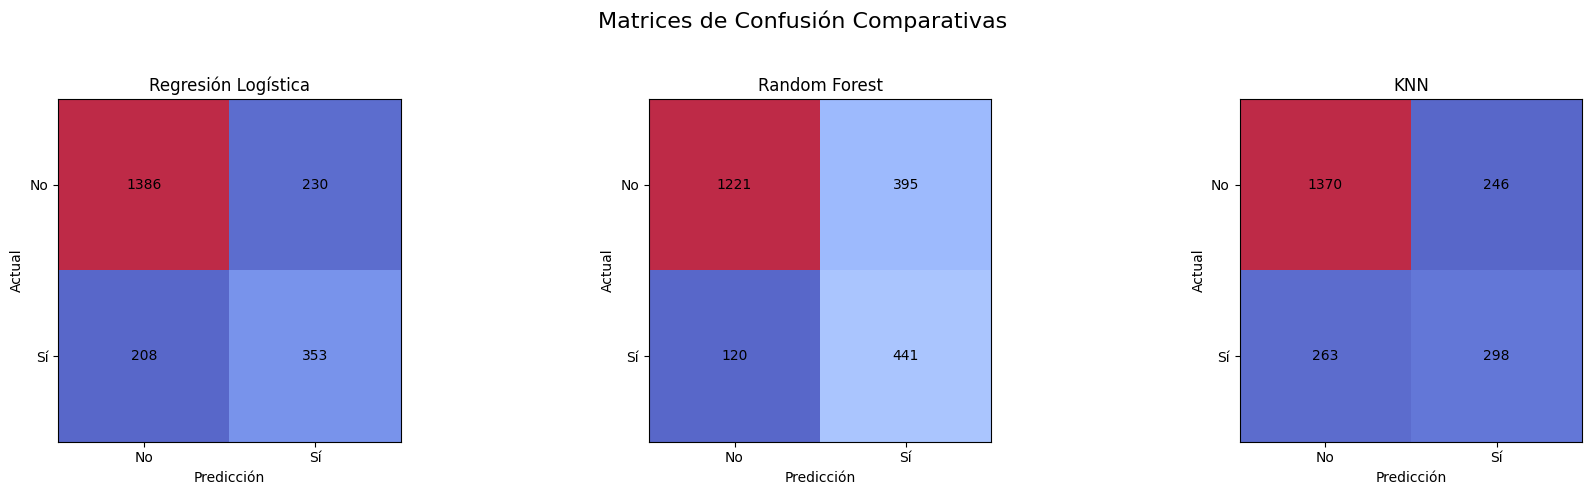

In [44]:
for nombre, y_pred in zip(modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de confusión — {nombre}:")
    print(cm, "\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, nombre, y_pred in zip(axes, modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap='coolwarm', alpha=0.85)
    ax.set_title(nombre)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_yticklabels(['No', 'Sí'])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

plt.suptitle('Matrices de Confusión Comparativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**OBSERVACIONES**



Matrices de confusión

Para cada modelo imprimimos la matriz 2×2, donde:

 1) cm[0: No , 0: No]: verdaderos negativos

 2) cm[0: No , 1: Sí ]: falsos positivos

 3) cm[1: Sí , 0: No]: falsos negativos

 4) cm[1:  Sí , 1: Sí]: verdaderos positivos



**Análisis de las matrices de confusión**

Regresión Logística

+ (TN = 1386, FP = 230; FN = 208, TP = 353): buen equilibrio entre falsos positivos y negativos, con un recall moderado (-0.63) y precisión aceptable (-0.61). No muestra indicios claros de overfitting, pero podría no capturar patrones no lineales (ligerísimo underfitting).

Random Forest

+ (TN = 1221, FP = 395; FN = 120, TP = 441): excelente detección de churn (recall ≈ 0.79) a costa de muchos falsos positivos, lo que baja su precisión (~0.53). Su mayor complejidad podría inducir cierto overfitting al sesgo de clase minoritaria; convendría probar poda más agresiva (reducir max_depth) o ajustar class_weight y umbral de decisión.

KNN

+ (TN = 1370, FP = 246; FN = 263, TP = 298): tanto recall (0.53) como precisión (0.55) son inferiores a los modelos anteriores, indicando underfitting y alta sensibilidad al parámetro k. Para mejorarlo, se puede optimizar k (con validación cruzada).

## MEJORANDO LOS MODELOS

In [45]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])


param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2']
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring='f1', n_jobs=-1)
gs_lr.fit(X_train, y_train)

print("Mejores hiperparámetros (Regresión Logística):", gs_lr.best_params_)


y_pred_lr = gs_lr.predict(X_test)
print("\nMétricas Regresión Logística (mejorada):")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_lr):.4f}")


Mejores hiperparámetros (Regresión Logística): {'clf__C': 0.01, 'clf__penalty': 'l2'}

Métricas Regresión Logística (mejorada):
Accuracy : 0.7956
Precision: 0.5997
Recall   : 0.6221
F1 Score : 0.6107


###Modelos Tree-Based mejorados (Random Forest y Gradient Boosting)

In [46]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]
X_test_df      = X_test[selected_features]
y_train_res    = y_train_res
y_test_series  = y_test


scaler = StandardScaler().fit(X_train_res_df)
X_train_scaled = scaler.transform(X_train_res_df)
X_test_scaled  = scaler.transform(X_test_df)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 5]
}
gs_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    rf_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_rf.fit(X_train_res_df, y_train_res)


gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gs_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_gb.fit(X_train_res_df, y_train_res)


knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_res)


preds = {
    'Random Forest': gs_rf.predict(X_test_df),
    'Gradient Boosting': gs_gb.predict(X_test_df),
    'KNN': knn.predict(X_test_scaled)
}


results = []
for name, y_pred in preds.items():
    results.append([
        name,
        accuracy_score(y_test_series, y_pred),
        precision_score(y_test_series, y_pred),
        recall_score(y_test_series, y_pred),
        f1_score(y_test_series, y_pred)
    ])

df_results = pd.DataFrame(
    results,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)

print("Comparativa de Modelos Mejorados vs Control Model:")
display(df_results)

Comparativa de Modelos Mejorados vs Control Model:


,Modelo,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.778135,0.558912,0.659537,0.605070
1,Gradient Boosting,0.788700,0.590664,0.586453,0.588551
2,KNN,0.766192,0.547794,0.531194,0.539367


**OBSERVACIONES**




--Se realizaron ajustes similares:

Balanceo con SMOTE,

Subconjunto de variables seleccionadas,

Búsqueda de hiperparámetros mediante GridSearchCV.





**RESULTADO:**

Gradient Boosting emergió como uno de los mejores modelos, mostrando consistencia entre precisión y recall, lo cual lo posiciona como modelo de referencia para interpretar con SHAP.

Random Forest, aunque con alto recall, sacrificó precisión. Esto sugiere que sobreajusta más a la clase minoritaria (abandono), produciendo falsos positivos.

KNN, aunque se incluyó por comparación, mostró desempeño inferior en recall y F1 Score, sensible a la escala y a ruido, por lo cual no se consideró fuerte candidato final.

### Modelo Gradient Boosting vs Modelos mejorados

In [47]:
X_test_full   = X_test
X_test_df     = X_test_full[selected_features]

y_pred_lr  = gs_lr.predict(X_test_full)
y_pred_rf  = gs_rf.predict(X_test_df)
y_pred_gb  = gs_gb.predict(X_test_df)

results = []
for name, y_pred in zip(
    ['Regresión Logística', 'Random Forest', 'Gradient Boosting'],
    [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_knn]
):
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

df_comparison = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(df_comparison)

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.795590,0.599656,0.622103,0.610674
1,Random Forest,0.778135,0.558912,0.659537,0.605070
2,Gradient Boosting,0.788700,0.590664,0.586453,0.588551


**OBSERVACIONES**

Al comparar todos los modelos (mejorados y base), se evidencia que:

Gradient Boosting se destaca por su equilibrio entre precisión y recall.

## Modelo Ensemble

In [48]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', gs_lr.best_estimator_),
        ('gb', gs_gb.best_estimator_)
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

metrics_ensemble = {
    'Accuracy':  accuracy_score(y_test, y_pred_ensemble),
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall':    recall_score(y_test, y_pred_ensemble),
    'F1 Score':  f1_score(y_test, y_pred_ensemble)
}

df_ensemble = pd.DataFrame([metrics_ensemble], index=['Ensemble LR + GB'])
display(df_ensemble)

,Accuracy,Precision,Recall,F1 Score
Ensemble LR + GB,0.80248,0.62768,0.573975,0.599628


**OBSERVACIONES**






Se planteó una combinación (VotingClassifier) entre:

Regresión Logística (modelo lineal, interpretable) y Gradient Boosting (modelo no lineal, robusto).

Esta estrategia busca combinar lo mejor de ambos mundos, aprovechando su complementariedad.




**RESULTADOS:**

El modelo ensemble logra mayor precisión (62.8%), lo que significa que acierta más en identificar correctamente a los clientes que realmente abandonan.

Sin embargo, su recall (57.4%) es ligeramente menor que el de la Regresión Logística mejorada, lo que indica que detecta menos abandonos que otros modelos, aunque los que detecta, lo hace con más certeza.

El F1 Score (0.5996), aunque no supera al de LR (0.6107), es competitivo y muestra un equilibrio aceptable entre precisión y recall.

### SELECCIONANDO EL MODELO

#### **Comparativa visual de Modelos con curva ROC**

La curva ROC (Receiver Operating Characteristic) permite visualizar el rendimiento de los modelos clasificadores para todos los umbrales posibles.

+ Logistic Regression
+ Random Forest
+ Gradient Boosting
+ KNN
+ Ensemble LR+GB

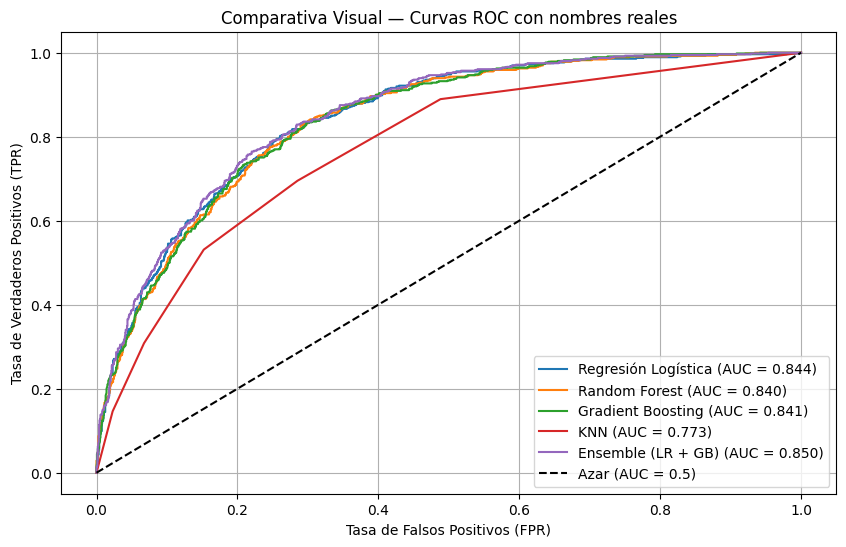

AUC de cada modelo:
Ensemble (LR + GB)        → AUC = 0.850
Regresión Logística       → AUC = 0.844
Gradient Boosting         → AUC = 0.841
Random Forest             → AUC = 0.840
KNN                       → AUC = 0.773


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score


modelos = {
    'Regresión Logística': gs_lr,
    'Random Forest': gs_rf,
    'Gradient Boosting': gs_gb,
    'KNN': knn,
    'Ensemble (LR + GB)': ensemble
}


auc_scores = {}

plt.figure(figsize=(10, 6))

for nombre, modelo in modelos.items():
    if nombre == 'Regresión Logística':
        y_proba = modelo.predict_proba(X_test_full)[:, 1]
    elif nombre == 'KNN':
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    elif nombre in ['Random Forest', 'Gradient Boosting']:
        y_proba = modelo.predict_proba(X_test_df)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test_full)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    auc_scores[nombre] = auc
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})')


plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparativa Visual — Curvas ROC con nombres reales')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC de cada modelo:")
for nombre, auc in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{nombre:25} → AUC = {auc:.3f}")


**OBSERVAACIONES**



Los resultados confirman que el modelo Ensemble (Regresión Logística + Gradient Boosting) es la mejor opción para predecir abandono de clientes.

### INTERPRETACIÓN DEL MODELO ENSEMBLE

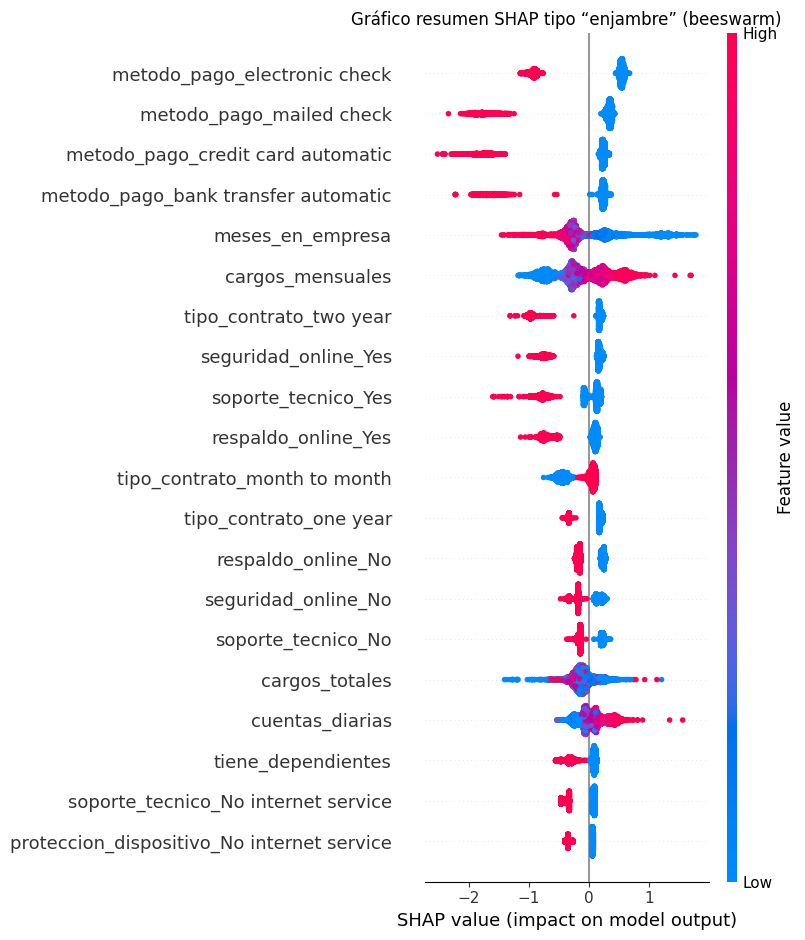

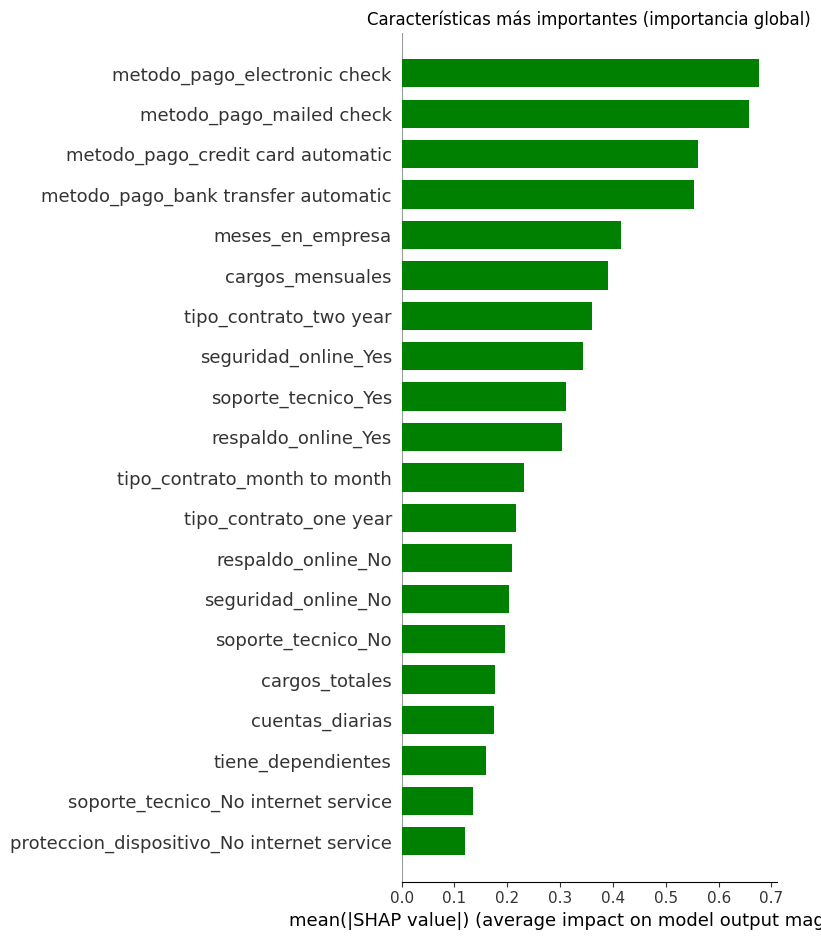

In [58]:
import shap
best_gb = gs_gb.best_estimator_

X_train_df = pd.DataFrame(X_train, columns=selected_features)

explainer = shap.TreeExplainer(best_gb)

shap_values = explainer.shap_values(X_train_df)

plt.title('Gráfico resumen SHAP tipo “enjambre” (beeswarm)')
shap.summary_plot(shap_values, X_train_df, show=True)

plt.title('Características más importantes (importancia global)')
shap.summary_plot(shap_values, X_train_df, plot_type='bar', show=True, color='green')

**OBSERVACIONES**

Es una visualización compacta que resume cómo cada variable influye en la predicción del modelo (por ejemplo, si un cliente abandona o no), usando los valores de SHAP (SHapley Additive exPlanations).

+ El método de pago y el tipo de contrato son factores clave en la decisión de abandono.

+ Servicios adicionales (seguridad, respaldo, soporte) están fuertemente relacionados con retención de clientes.

+ Clientes con mayores cargos mensuales y contratos sin compromiso (mes a mes) son los más propensos a abandonar.

+ El modelo Gradient Boosting capta bien estas relaciones, mostrando patrones coherentes y fácilmente interpretables con SHAP.

###Interpretabilidad con coeficientes de la Regresión Logística en el modelo Ensemble

In [60]:
lr_model = gs_lr.best_estimator_.named_steps['clf']
feature_names = X_train.columns

df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': lr_model.coef_[0]
})
df_coef['Importancia (abs)'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='Importancia (abs)', ascending=False)

print("Top 10 variables que más influyen en el abandono:")
display(df_coef.head(10))

Top 10 variables que más influyen en el abandono:


,Variable,Coeficiente,Importancia (abs)
3,meses_en_empresa,-0.612956,0.612956
36,metodo_pago_credit card automatic,-0.538459,0.538459
13,genero_Male,-0.531368,0.531368
35,metodo_pago_bank transfer automatic,-0.517491,0.517491
12,genero_Female,-0.508989,0.508989
38,metodo_pago_mailed check,-0.462889,0.462889
34,tipo_contrato_two year,-0.442297,0.442297
37,metodo_pago_electronic check,-0.437500,0.437500
16,seguridad_online_Yes,-0.416754,0.416754
25,soporte_tecnico_Yes,-0.409150,0.409150


**OBSERVACIONES**


En la regresión logística:

+ Coeficientes negativos → disminuyen la probabilidad de abandono.
+ Cuanto más grande sea el valor absoluto del coeficiente, mayor es su influencia.



El modelo de regresión muestra que la fidelización está influenciada por el tiempo en la empresa, el tipo de contrato, y servicios adicionales como soporte técnico y seguridad online, así como métodos de pago automáticos, que facilitan la continuidad.